In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score,recall_score, confusion_matrix

In [2]:
df_onehot = pd.read_csv('onehot_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot
# pd.read_csv('label_encoding_data.csv')

,age,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,...,default_unknown,loan_no,loan_yes,loan_unknown,pdays,previous,pout_no,pout_yes,pout_unknown,y
0,56,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1,0,0.0,0.0,1.0,0
1,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,-1,0,0.0,0.0,1.0,0
2,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,-1,0,0.0,0.0,1.0,0
3,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1,0,0.0,0.0,1.0,0
4,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,-1,0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1,0,0.0,0.0,1.0,1
41184,46,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1,0,0.0,0.0,1.0,0
41185,56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1,0,0.0,0.0,1.0,0
41186,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1,0,0.0,0.0,1.0,1


In [3]:
np.random.seed(0)
tf.random.set_seed(0)

In [4]:
feature = df_onehot.loc[:,:'pout_unknown']
target = df_onehot['y']

X = np.array(feature)
y = np.array(target)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

model = Sequential()
model.add(Dense(30,input_dim = len(feature.columns),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,batch_size=100)

Epoch 1/20
289/289 [==============================] - 1s 2ms/step - loss: 0.3342 - accuracy: 0.8913
Epoch 2/20
289/289 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.8974
Epoch 3/20
289/289 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8980
Epoch 4/20
289/289 [==============================] - 1s 2ms/step - loss: 0.3130 - accuracy: 0.8983
Epoch 5/20
289/289 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8983
Epoch 6/20
289/289 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8985
Epoch 7/20
289/289 [==============================] - 1s 2ms/step - loss: 0.3129 - accuracy: 0.8980
Epoch 8/20
289/289 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8980
Epoch 9/20
289/289 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8989
Epoch 10/20
289/289 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8983

In [5]:
y_pred = model.predict(X_test)
# list(y_pred.reshape(1,-1))
# y_test/
# y_pred.reshape(1,-1)[0]
# y_test


In [6]:
recall = tf.keras.metrics.Recall()
recall

In [7]:
y_test
y_pred.reshape(-1,1)

array([[0.07485148],
       [0.1637573 ],
       [0.04590312],
       ...,
       [0.08622593],
       [0.10868588],
       [0.13951427]], dtype=float32)

In [33]:
dnn = pd.DataFrame(data=y_pred).astype('float64')
dnn[0]=dnn[0].apply(lambda x: 1 if x >= 0.5 else 0)
dnn.sum()

0    511
dtype: int64

In [8]:
feature = df_onehot.loc[:,:'pout_unknown']
target = df_onehot['y']

X = np.array(feature)
y = np.array(target)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

model = Sequential()
model.add(Dense(30,input_dim = len(feature.columns),activation='relu'))
model.add(Dense(30,input_dim = len(feature.columns),activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                          ,tf.keras.metrics.Recall(name='recall')
                          ,tf.keras.metrics.FalsePositives(name='false_positives')
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                          ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])
history = model.fit(X_train,y_train,epochs=20,batch_size=100)


Epoch 1/20
289/289 [==============================] - 2s 2ms/step - loss: 0.3859 - accuracy: 0.8626 - precision: 0.2509 - recall: 0.1098 - false_positives: 1066.0000 - false_negatives: 2895.0000 - f1_score: 0.2027
Epoch 2/20
289/289 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.8969 - precision: 0.6624 - recall: 0.1750 - false_positives: 290.0000 - false_negatives: 2683.0000 - f1_score: 0.2027
Epoch 3/20
289/289 [==============================] - 1s 2ms/step - loss: 0.3137 - accuracy: 0.8982 - precision: 0.6656 - recall: 0.1959 - false_positives: 320.0000 - false_negatives: 2615.0000 - f1_score: 0.2027
Epoch 4/20
289/289 [==============================] - 1s 2ms/step - loss: 0.3125 - accuracy: 0.8986 - precision: 0.6684 - recall: 0.2002 - false_positives: 323.0000 - false_negatives: 2601.0000 - f1_score: 0.2027
Epoch 5/20
289/289 [==============================] - 1s 2ms/step - loss: 0.3119 - accuracy: 0.8983 - precision: 0.6633 - recall: 0.1993 - false_po

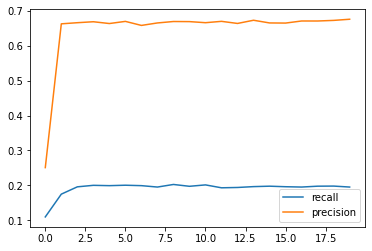

In [9]:
history.history.keys()

plt.plot(history.history['recall'],label='recall')
plt.plot(history.history['precision'],label='precision')
plt.legend()
plt.show()


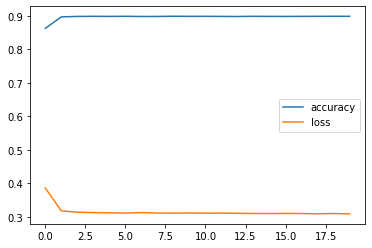

In [10]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.legend()

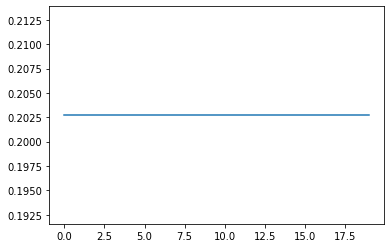

In [11]:
plt.plot(history.history['f1_score'])

In [12]:
model.evaluate(X_test,y_test)[1]

387/387 [==============================] - 1s 2ms/step - loss: 0.3159 - accuracy: 0.8958 - precision: 0.6073 - recall: 0.2039 - false_positives: 183.0000 - false_negatives: 1105.0000 - f1_score: 0.2020


0.8957675695419312

In [13]:
df_dropna = pd.read_csv('onehotdropna_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_dropna

feature = df_dropna.loc[:,:'pout_unknown']
target = df_dropna['y']

X = np.array(feature)
y = np.array(target)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

model = Sequential()
model.add(Dense(30,input_dim = len(feature.columns),activation='relu'))
model.add(Dense(30,input_dim = len(feature.columns),activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                          ,tf.keras.metrics.Recall(name='recall')
                          ,tf.keras.metrics.FalsePositives(name='false_positives')
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                          ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])
history = model.fit(X_train,y_train,epochs=20,batch_size=100)

Epoch 1/20
214/214 [==============================] - 2s 2ms/step - loss: 0.3850 - accuracy: 0.8788 - precision: 0.6248 - recall: 0.1260 - false_positives: 206.0000 - false_negatives: 2380.0000 - f1_score: 0.2263
Epoch 2/20
214/214 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8823 - precision: 0.6443 - recall: 0.1730 - false_positives: 260.0000 - false_negatives: 2252.0000 - f1_score: 0.2263
Epoch 3/20
214/214 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8832 - precision: 0.6478 - recall: 0.1851 - false_positives: 274.0000 - false_negatives: 2219.0000 - f1_score: 0.2263
Epoch 4/20
214/214 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8828 - precision: 0.6402 - recall: 0.1862 - false_positives: 285.0000 - false_negatives: 2216.0000 - f1_score: 0.2263
Epoch 5/20
214/214 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8827 - precision: 0.6420 - recall: 0.1818 - false_pos

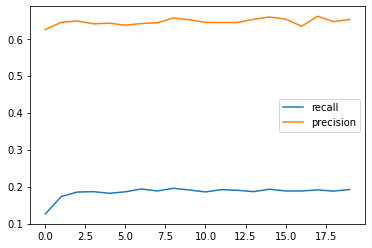

In [14]:
plt.plot(history.history['recall'],label='recall')
plt.plot(history.history['precision'],label='precision')
plt.legend()
plt.show()